# A Complete Tutorial on Time Series Modeling

Goal of this tutorial is to providing simplified understanding and explanations of Time Series Modeling concepts

This enhancment will provide a deeper understanding towards people who are studying Time Series

The bolded text is the TLDR, so we save **TIME** ourselves (get it?) 

Credit to https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

## Introduction

‘Time’ is the most important factor which ensures success in a business. It’s difficult to keep up with the pace of time.  But, technology has developed some powerful methods using which we can ‘see things’ ahead of time. Don’t worry, I am not talking about Time Machine. Let’s be realistic here!

I’m talking about the **methods of prediction & forecasting**. One such method, which deals with time based data is **Time Series Modeling.** As the name suggests, it involves working on time **(years, days, hours, minutes)** based data, to derive hidden insights to make informed decision making.

Time series models are very useful models when you have serially correlated data. **Most of business houses work on time series data to analyze sales number for the next year, website traffic, competition position and much more.** However, it is also one of the areas, which many analysts do not understand.

In [3]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Table of Contents
1. Basics – Time Series Modeling
2. Exploration of Time Series Data in R
3. Introduction to ARMA Time Series Modeling
4. Framework and Application of ARIMA Time Series Modeling

## 1. Basics - Time Series Modeling
Let’s begin from basics.  **This includes stationary series, random walks , Rho Coefficient, Dickey Fuller Test of Stationarity.** If these terms are already scaring you, don’t worry – they will become clear in a bit and I bet you will start enjoying the subject as I explain it.

## Stationary Series
There are three basic criterion for a series to be classified as stationary series :

    1. The mean of the series should not be a function of time rather should be a constant. The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.

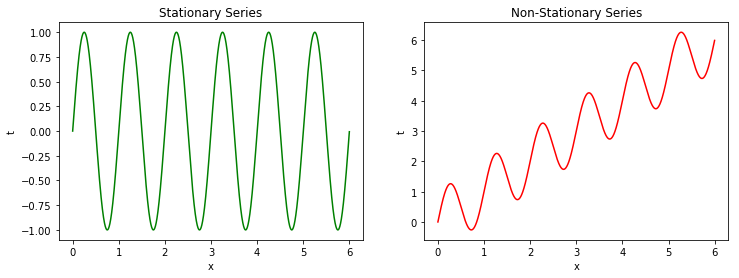

In [5]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
a = np.arange(0.0, 6.0, 0.001)
axes[0].plot(a, np.sin(2*np.pi*a), 'g')
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].grid(False)
axes[0].set_title('Stationary Series')
axes[1].plot(a, np.sin(2*np.pi*a) + a, 'r')
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].grid(False)
axes[1].set_title('Non-Stationary Series');

    2. The variance of the series should not a be a function of time. This property is known as homoscedasticity. Following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph)

Text(0.5,1,'Non-Stationary Series')

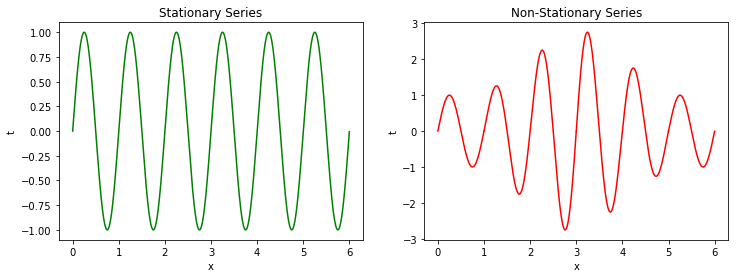

In [6]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
a0 = np.arange(0.0, 6.0, 0.001)
axes[0].plot(a0, np.sin(2*np.pi*a0), 'g')
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].grid(False)
axes[0].set_title('Stationary Series')
a1 = np.arange(0.0, 1.0, 0.001)
b1 = np.arange(1.0, 3.0, 0.001)
c1 = np.arange(3.0, 5.0, 0.001)
d1 = np.arange(5.0, 6.0, 0.001)
axes[1].plot(a1, np.sin(2*np.pi*a1), 'r')
axes[1].plot(b1, b1 * np.sin(2*np.pi*b1), 'r')
axes[1].plot(c1, (6 - c1) * np.sin(2*np.pi*c1), 'r')
axes[1].plot(d1, np.sin(2*np.pi*d1), 'r')
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].grid(False)
axes[1].set_title('Non-Stationary Series');

    3. The variance of the series should not a be a function of time. This property is known as homoscedasticity. Following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph)

Text(0.5,1,'Non-Stationary Series')

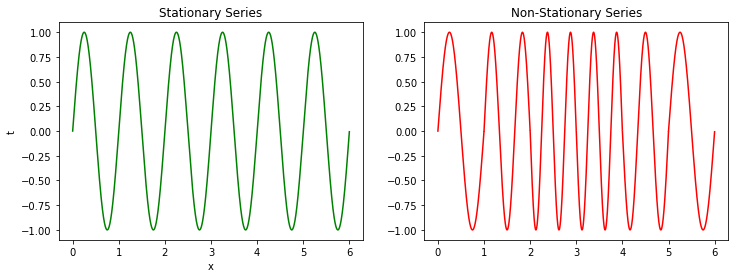

In [7]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
a0 = np.arange(0.0, 6.0, 0.001)
axes[0].plot(a0, np.sin(2*np.pi*a0), 'g')
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].grid(False)
axes[0].set_title('Stationary Series')

a1 = np.arange(0.0, 1.0, 0.001)
b1 = np.arange(1.0, 2.0, 0.001)
c1 = np.arange(2.0, 3.0, 0.001)
d1 = np.arange(3.0, 4.0, 0.001)
e1 = np.arange(4.0, 5.0, 0.001)
f1 = np.arange(5.0, 6.0, 0.001)
axes[1].plot(a1, np.sin(2*np.pi*a1), 'r')
axes[1].plot(b1, -np.sin(2*np.pi*(1.5*b1)), 'r')
axes[1].plot(c1, -np.sin(2*np.pi*(2*c1)), 'r')
axes[1].plot(d1, -np.sin(2*np.pi*(2*d1)), 'r')
axes[1].plot(e1, -np.sin(2*np.pi*(1.5*e1)), 'r')
axes[1].plot(f1, np.sin(2*np.pi*f1), 'r')
axes[1].grid(False)
axes[1].set_title('Non-Stationary Series');

## Why do I care about ‘stationarity’ of a time series?

The reason I took up this section first was that until **unless your time series is stationary, you cannot build a time series model.** In cases where the stationary criterion are violated, the first requisite becomes to stationarize the time series and then try stochastic models to predict this time series. There are multiple ways of bringing this stationarity. Some of them are Detrending, Differencing etc.



## Random Walk
This is the most basic concept of the time series. You might know the concept well. But, I found many people in the industry who interprets random walk as a stationary process. In this section with the help of some mathematics, I will make this concept crystal clear for ever. Let’s take an example.

**Example:** Imagine a girl moving randomly on a giant chess board. In this case, next position of the girl is only dependent on the last position.

Now imagine, you are sitting in another room and are not able to see the girl. You want to predict the position of the girl with time. How accurate will you be? Of course you will become more and more inaccurate as the position of the girl changes. At t=0 you exactly know where the girl is. Next time, she can only move to 8 squares and hence your probability dips to 1/8 instead of 1 and it keeps on going down. Now let’s try to formulate this series :

$$ X(t) = X(t-1) + Er(t) $$ 

where Er(t) is the error at time t. This is the randomness the girl brings at every point in time.

Now, if we recursively fit in all the Xs, we will finally end up to the following equation

$$ X(t) = X(0) + Sum(Er(1),Er(2),Er(3).....Er(t)) $$

Now, lets try validating our assumptions of stationary series on this random walk formulation:

1. Is the Mean constant ?
$$E[X(t)] = E[X(0)] + Sum(E[Er(1)],E[Er(2)],E[Er(3)].....E[Er(t)])$$

We know that Expectation of any Error will be zero as it is random.

Hence we get E[X(t)] = E[X(0)] = Constant.

2. Is the Variance constant?
$$ Var[X(t)] = Var[X(0)] + Sum(Var[Er(1)],Var[Er(2)],Var[Er(3)].....Var[Er(t)])
$$ 

$$ Var[X(t)] = t * Var(Error) = Time dependent 
$$ 

Hence, we infer that the random walk is not a stationary process as it has a time variant variance. Also, if we check the covariance, we see that too is dependent on time.